In [11]:
import numpy as np
import plotly.figure_factory as ff
from scipy import stats
import matplotlib.pyplot as plt

In [26]:
# Step 1: Generate a sample from a three-category multinomial distribution
n = 1000  # Number of trials
p = [0.3, 0.4, 0.3]  # Probability of each category
multinomial_sample = np.random.multinomial(n, p)

# Print the sample result
print("Multinomial Sample:", multinomial_sample)

Multinomial Sample: [307 378 315]


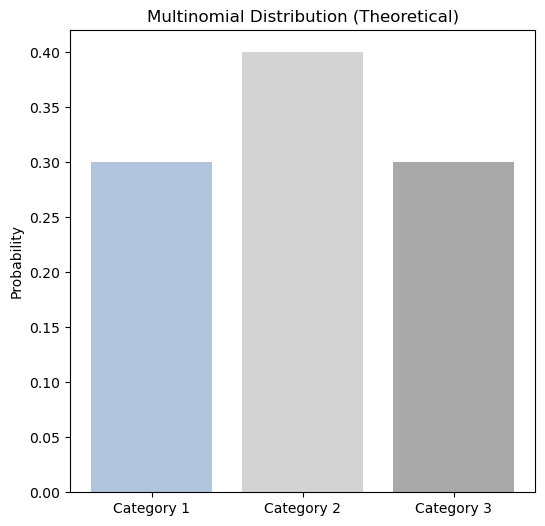

In [27]:
# Step 2: Visualize the multinomial distribution
categories = ['Category 1', 'Category 2', 'Category 3']

# Plotting the multinomial distribution (theoretical probabilities)
plt.figure(figsize=(6, 6))
plt.bar(categories, p, color=['#B0C4DE', '#D3D3D3', '#A9A9A9'])  
plt.ylabel('Probability')
plt.title('Multinomial Distribution (Theoretical)')
plt.show()

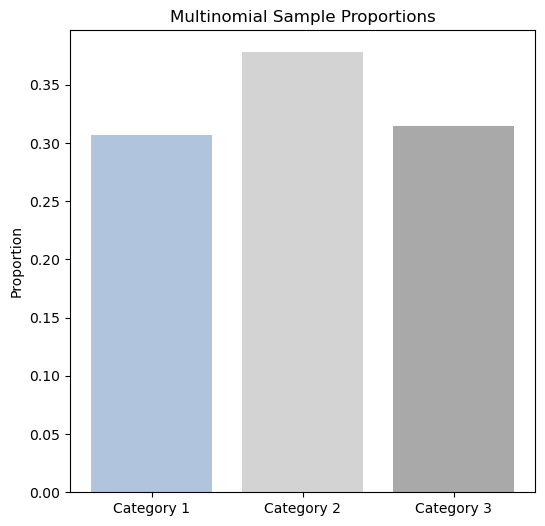

In [28]:
# Step 3: Visualize the multinomial sample
# Normalize the sample to visualize the proportions in the categories
sample_proportions = multinomial_sample / n

# Plotting the sample proportions
plt.figure(figsize=(6, 6))
plt.bar(categories, sample_proportions, color=['#B0C4DE', '#D3D3D3', '#A9A9A9'])
plt.ylabel('Proportion')
plt.title('Multinomial Sample Proportions')
plt.show()

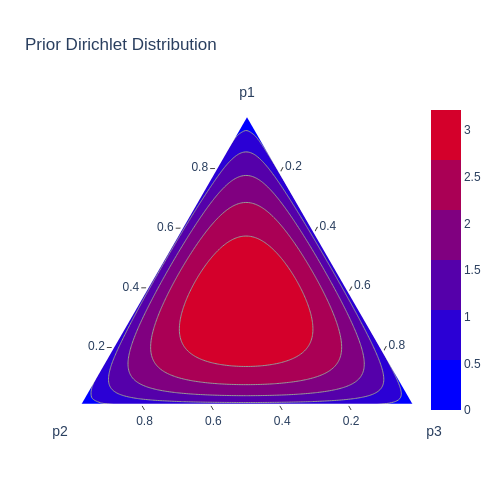

In [70]:
# Step 4: Visualize the Dirichlet distribution using a ternary plot
# Define a prior Dirichlet distribution (symmetric prior)
alpha_prior = np.array([1.5, 1.5, 1.5])  # Slightly non-symmetric prior
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

# Create a grid over the simplex for the ternary plot
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Calculate Dirichlet densities
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# Create a ternary contour plot
fig = ff.create_ternary_contour(
    p.T, dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    title="Prior Dirichlet Distribution"
)

# Show the ternary plot for the prior distribution
fig.show('png')

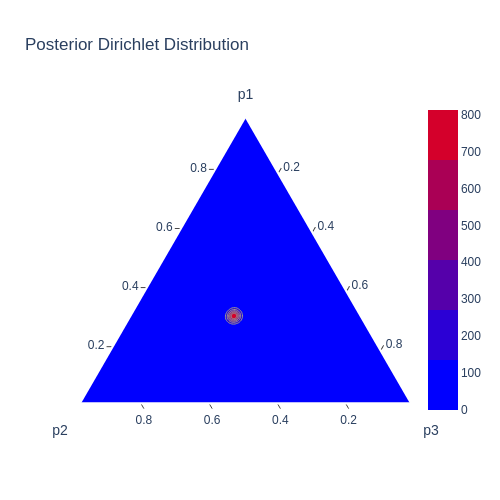

In [71]:
# Step 5: Posterior distribution (updating based on the multinomial sample)
alpha_posterior = alpha_prior + multinomial_sample

# Create the posterior Dirichlet distribution
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)

# Calculate posterior densities
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# Create a ternary contour plot for the posterior distribution
fig_posterior = ff.create_ternary_contour(
    p.T, dirichlet_posterior_densities,  
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    title="Posterior Dirichlet Distribution"  
)

# Show the ternary plot for the posterior distribution
fig_posterior.show('png')
